### Load libraries

In [2]:
# Library for data visualisation
import pandas as pd
import numpy as np
from pathlib import Path
import os

In [3]:
2<3


True


## Import the csv Data and make some exploration plots on them for the report



In [4]:
df = pd.read_csv("dataset.csv")
df.head(10)

,filestem,patient_id,study_number,timehash,gender,age,laterality,projection,initial_exam,ao_classification,cast,diagnosis_uncertain,osteopenia,fracture_visible,metal,pixel_spacing,device_manufacturer
0,0001_1297860395_01_WRI-L1_M014,1,1,1297860395,M,14.1,L,1,1.0,23r-M/2.1,NaN,NaN,NaN,NaN,NaN,0.144,Siemens
1,0001_1297860435_01_WRI-L2_M014,1,1,1297860435,M,14.1,L,2,1.0,23r-M/2.1,NaN,NaN,NaN,1.0,NaN,0.144,Siemens
2,0002_0354485735_01_WRI-R1_F012,2,1,354485735,F,12.0,R,1,1.0,23r-M/2.1,NaN,1.0,NaN,NaN,NaN,0.144,Siemens
3,0002_0354485759_01_WRI-R2_F012,2,1,354485759,F,12.0,R,2,1.0,23r-M/2.1,NaN,1.0,NaN,NaN,NaN,0.144,Siemens
4,0003_0662359226_01_WRI-R1_M011,3,1,662359226,M,11.1,R,1,1.0,23-M/3.1,NaN,NaN,NaN,1.0,NaN,0.144,Siemens
5,0003_0662359351_01_WRI-R2_M011,3,1,662359351,M,11.1,R,2,1.0,23-M/3.1,NaN,NaN,NaN,1.0,NaN,0.144,Siemens
6,0003_0663715732_02_WRI-R1_M011,3,2,663715732,M,11.2,R,1,NaN,23-M/3.1,1.0,NaN,NaN,1.0,NaN,0.144,Siemens
7,0003_0663715782_02_WRI-R2_M011,3,2,663715782,M,11.2,R,2,NaN,23-M/3.1,1.0,NaN,NaN,1.0,NaN,0.144,Siemens
8,0003_0664918633_03_WRI-R1_M011,3,3,664918633,M,11.2,R,1,NaN,23-M/3.1,NaN,NaN,1.0,1.0,NaN,0.144,Siemens
9,0003_0664918693_03_WRI-R2_M011,3,3,664918693,M,11.2,R,2,NaN,23-M/3.1,NaN,NaN,1.0,1.0,NaN,0.144,Siemens


In [5]:
grouped = df.groupby("gender")

In [6]:
for name, group in grouped:
    print(name + ' group:')
    print(group.describe())

F group:
        patient_id  study_number      timehash          age   projection  \
count  8285.000000   8285.000000  8.285000e+03  8285.000000  8285.000000   
mean   3011.477852      1.742305  7.116090e+08    10.271865     1.510078   
std    1748.751358      1.279543  2.965055e+08     3.525524     0.509496   
min       2.000000      1.000000  7.244996e+07     0.200000     1.000000   
25%    1496.000000      1.000000  4.615119e+08     8.000000     1.000000   
50%    2972.000000      1.000000  7.161677e+08    10.300000     2.000000   
75%    4556.000000      2.000000  9.535095e+08    12.600000     2.000000   
max    6091.000000     12.000000  1.325713e+09    18.700000     3.000000   

       initial_exam    cast  diagnosis_uncertain  osteopenia  \
count        5178.0  1863.0                184.0       801.0   
mean            1.0     1.0                  1.0         1.0   
std             0.0     0.0                  0.0         0.0   
min             1.0     1.0                  1.0  

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20327 entries, 0 to 20326
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   filestem             20327 non-null  object 
 1   patient_id           20327 non-null  int64  
 2   study_number         20327 non-null  int64  
 3   timehash             20327 non-null  int64  
 4   gender               20327 non-null  object 
 5   age                  20327 non-null  float64
 6   laterality           20327 non-null  object 
 7   projection           20327 non-null  int64  
 8   initial_exam         10861 non-null  float64
 9   ao_classification    14158 non-null  object 
 10  cast                 5776 non-null   float64
 11  diagnosis_uncertain  537 non-null    float64
 12  osteopenia           2473 non-null   float64
 13  fracture_visible     13550 non-null  float64
 14  metal                708 non-null    float64
 15  pixel_spacing        20327 non-null 

In [31]:
df.describe()

,patient_id,study_number,timehash,age,projection,initial_exam,cast,diagnosis_uncertain,osteopenia,fracture_visible,metal,pixel_spacing
count,20327.000000,20327.000000,2.032700e+04,20327.000000,20327.000000,10861.0,5776.0,537.0,2473.0,13550.0,708.0,20327.000000
mean,3030.858907,1.869828,7.158175e+08,10.920151,1.508388,1.0,1.0,1.0,1.0,1.0,1.0,0.143994
std,1756.941503,1.351556,2.979092e+08,3.605313,0.509012,0.0,0.0,0.0,0.0,0.0,0.0,0.000074
min,1.000000,1.000000,7.244996e+07,0.200000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.143000
25%,1510.000000,1.000000,4.627350e+08,8.500000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.144000
50%,2995.000000,1.000000,7.156266e+08,11.200000,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.144000
75%,4561.000000,2.000000,9.641821e+08,13.600000,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.144000
max,6093.000000,12.000000,1.325713e+09,19.000000,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.144000


['M' 'F' 'O']


<AxesSubplot:>

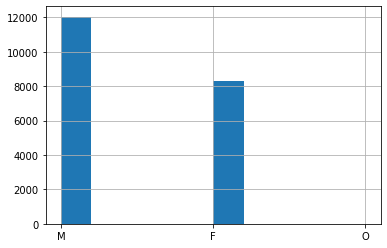

In [35]:
print(df.gender.unique())
df.gender.hist()

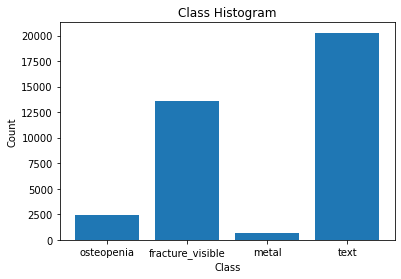

In [36]:
import matplotlib.pyplot as plt


class_counts = pd.DataFrame({'class' : ['osteopenia','fracture_visible','metal','text'], 'count': [df['osteopenia'].sum(), df['fracture_visible'].sum(),df['metal'].sum(), 20274]})

# Plot the histogram
fig, ax = plt.subplots()
ax.bar(class_counts['class'], class_counts['count'])
ax.set_title('Class Histogram')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
plt.show()

In [43]:
#number of unique patients 
instances = df.filestem.values

tmp_list = []

for idx in range(len(instances)):
    text = instances[idx]
    tmp_list.append(text[:4])


In [49]:
from collections import Counter

counts = Counter(tmp_list)
unique = list(counts.keys())
print(len(unique))

6091


In [50]:
print("We have " , len(unique) , " unique patients in this dataset" )

We have  6091  unique patients in this dataset


In [23]:
print('The dataset has :' , df.fracture_visible.value_counts().values , 'images with Fractures')

The dataset has : [13550] images with Fractures


In [7]:
df = df.drop(columns=['diagnosis_uncertain','osteopenia','metal','device_manufacturer','cast','timehash','pixel_spacing'])
df = df.fillna(0)
df.head(15)

,filestem,patient_id,study_number,gender,age,laterality,projection,initial_exam,ao_classification,fracture_visible
0,0001_1297860395_01_WRI-L1_M014,1,1,M,14.1,L,1,1.0,23r-M/2.1,0.0
1,0001_1297860435_01_WRI-L2_M014,1,1,M,14.1,L,2,1.0,23r-M/2.1,1.0
2,0002_0354485735_01_WRI-R1_F012,2,1,F,12.0,R,1,1.0,23r-M/2.1,0.0
3,0002_0354485759_01_WRI-R2_F012,2,1,F,12.0,R,2,1.0,23r-M/2.1,0.0
4,0003_0662359226_01_WRI-R1_M011,3,1,M,11.1,R,1,1.0,23-M/3.1,1.0
5,0003_0662359351_01_WRI-R2_M011,3,1,M,11.1,R,2,1.0,23-M/3.1,1.0
6,0003_0663715732_02_WRI-R1_M011,3,2,M,11.2,R,1,0.0,23-M/3.1,1.0
7,0003_0663715782_02_WRI-R2_M011,3,2,M,11.2,R,2,0.0,23-M/3.1,1.0
8,0003_0664918633_03_WRI-R1_M011,3,3,M,11.2,R,1,0.0,23-M/3.1,1.0
9,0003_0664918693_03_WRI-R2_M011,3,3,M,11.2,R,2,0.0,23-M/3.1,1.0


Save the processed csv

In [12]:
os.getcwd()

'c:\\Users\\spiro\\OneDrive\\Υπολογιστής\\Thesis\\Project\\master_thesis_dtu\\notebooks'

In [13]:
df.to_csv('processed_dataset.csv', index=False)

In [4]:
os.mkdir("../literature/Other/supervisely/wrist/test_images")
os.mkdir("../literature/Other/supervisely/wrist/train_images")
os.mkdir("../literature/Other/supervisely/wrist/test_ann")
os.mkdir("../literature/Other/supervisely/wrist/train_ann")

### Make a train-test subset for DETR 


In [5]:
random.seed(1234)
idx = random.sample(range(20327), 3000)

# Iterate over each file in the source directory
for i, filename in enumerate(img_dir):

    src_path = os.path.join('../literature/Other/supervisely/wrist/img/', filename)


    # If the current file is one of the test files, move it to the test directory
    if i in idx:
        target_path = os.path.join('../literature/Other/supervisely/wrist/test_images/', filename)
        shutil.copy(src_path, target_path)

    # Otherwise, move it to the train directory
    else:
        target_path = os.path.join('../literature/Other/supervisely/wrist/train_images/', filename)
        shutil.copy(src_path, target_path)

# DO THE SAME FOR ANNOTATIONS
for i, filename in enumerate(ann_dir):

    src_path = os.path.join('../literature/Other/supervisely/wrist/ann/', filename)
    

    # If the current file is one of the test files, move it to the test directory
    if i in idx:
        target_path = os.path.join('../literature/Other/supervisely/wrist/test_ann/', filename)
        shutil.copy(src_path, target_path)

    # Otherwise, move it to the train directory
    else:
        target_path = os.path.join('../literature/Other/supervisely/wrist/train_ann/', filename)
        shutil.copy(src_path, target_path)

In [7]:
print(len(os.listdir('../literature/Other/supervisely/wrist/img')))
print(len(os.listdir('../literature/Other/supervisely/wrist/test_images')))
print(len(os.listdir('../literature/Other/supervisely/wrist/train_images')))
print(len(os.listdir('../literature/Other/supervisely/wrist/test_ann')))
print(len(os.listdir('../literature/Other/supervisely/wrist/train_ann')))


20327
3000
17327
3000
17327


In [8]:
idx

[14441,
 3828,
 245,
 2970,
 19078,
 1144,
 2750,
 3225,
 11620,
 7759,
 571,
 1009,
 519,
 11340,
 15867,
 20179,
 15189,
 4867,
 2991,
 5999,
 3749,
 479,
 16485,
 15949,
 8186,
 2115,
 17730,
 15266,
 2246,
 19708,
 2914,
 16876,
 18972,
 1506,
 8833,
 18233,
 2066,
 9909,
 15762,
 11640,
 8731,
 8164,
 6554,
 14856,
 17372,
 632,
 16649,
 2313,
 189,
 10928,
 4711,
 15493,
 12364,
 5475,
 1775,
 2498,
 19252,
 16271,
 5374,
 2468,
 18262,
 7048,
 4726,
 888,
 11345,
 3633,
 17356,
 4627,
 10007,
 14881,
 1297,
 13639,
 9069,
 1317,
 5811,
 8902,
 5064,
 9839,
 15220,
 1345,
 18451,
 12654,
 11455,
 16248,
 11197,
 19099,
 15339,
 15595,
 1485,
 15428,
 19494,
 5569,
 14404,
 17013,
 14348,
 9688,
 9012,
 4059,
 6082,
 13642,
 14288,
 3914,
 17360,
 3378,
 15899,
 12347,
 8371,
 6272,
 11316,
 3544,
 5150,
 19019,
 8825,
 5074,
 10600,
 14636,
 2319,
 2572,
 12951,
 7017,
 1564,
 9376,
 1245,
 7189,
 16604,
 2872,
 10386,
 10014,
 15100,
 2170,
 19168,
 8435,
 2392,
 13969,
 6615,
 

In [40]:

random.seed(1234)
idx = random.sample(range(20327), 3000)

for img in np.array(img_dir)[idx]:
    shutil.copy('literature/Other/supervisely/wrist/img/'+img, 'literature/Other/supervisely/wrist/test_images/'+img)

for annot in np.array(ann_dir)[idx]:
    shutil.copy('literature/Other/supervisely/wrist/ann/'+annot, 'literature/Other/supervisely/wrist/test_annotations/'+annot)


In [41]:
print(len(os.listdir('literature/Other/supervisely/wrist/ann')))
print(len(os.listdir('literature/Other/supervisely/wrist/img')))
print(len(os.listdir('literature/Other/supervisely/wrist/test_annotations')))
print(len(os.listdir('literature/Other/supervisely/wrist/test_images')))

15327
15327
5000
5000


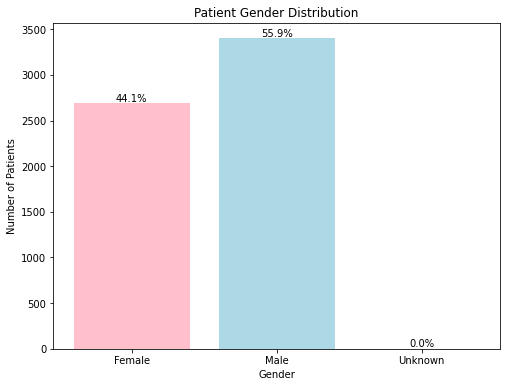

In [1]:
import matplotlib.pyplot as plt

# Data
categories = ['Female', 'Male', 'Unknown']
counts = [2688, 3402, 1]
total = sum(counts)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(categories, counts, color=['pink', 'lightblue', 'gray'])

# Add labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Patients')
ax.set_title('Patient Gender Distribution')

# Add annotations for the percentage of each category
for i, count in enumerate(counts):
    percentage = count/total*100
    ax.annotate(f'{percentage:.1f}%', xy=(categories[i], count), ha='center', va='bottom')

# Show the plot
plt.show()
